Mini batch Gradient Descent (MBDG) dùng một số mẫu để huấn luyện mô hình. Gọi bs là số lượng mẫu được dùng cho một lần cập nhật tham số, các bước tính theo MBGD tại: https://aivietnam.ai/courses/aisummer2019/lessons/batch-gradient-descent/

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data = genfromtxt('my_house_price_prediction.csv', delimiter=',')
m = data.shape[0]
X = data[:, 0]
y = data[:, 1:]
X_b = np.c_[np.ones((m, 1)), X]

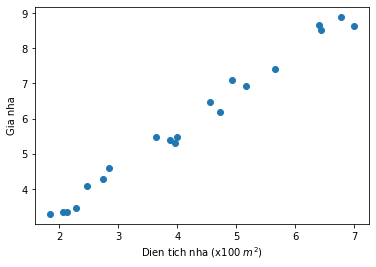

In [3]:
plt.scatter(X, y)
plt.xlabel('Dien tich nha (x100 $m^2$)')
plt.ylabel('Gia nha')
plt.show()

In [9]:
for i in range(0, 10, 9):
    print(i + 9)
X.shape

9
18


(20,)

In [46]:
def mini_batch_gradient_descent():
    n_iterations = 30
    minibatch_size = 10
    
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # tinh output
            output = np.dot(xi, thetas)
            
            # tinh loss
            loss = (output - yi)**2
            
            # tinh dao ham cho loss
            loss_grd = 2 / minibatch_size * (output - yi)
            
            # tinh dao ham cho cac ham so
            gradients = np.dot(xi.T, loss_grd)
            
            # cap nhat tham so
            learning_rate = 0.01
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)
            
    return thetas_path, losses

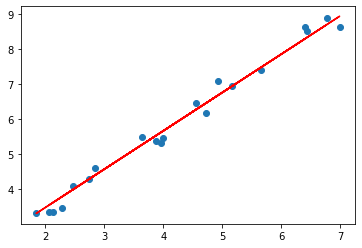

In [47]:
mbgd_thetas, losses = mini_batch_gradient_descent()
plt.scatter(X, y)
data_y = X*mbgd_thetas[-1][1]+ mbgd_thetas[-1][0]
plt.plot(X,data_y, color="r")
plt.show()

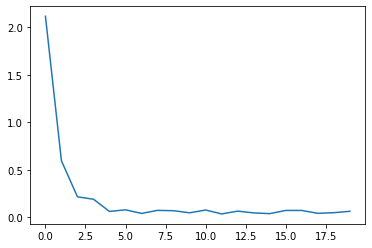

In [49]:
plt.plot(losses[:20])